# Многослойный персептрон


## Создание перспетрона
### 1. По умолчанию (с рандомными весами)

### 2. С заданными весами

# Датасет "Ноутбуки"
Изначально перспетрон был создан с рандомными весами.
На тестовой выборке модель показала следующие результаты:

***MAE = 246.6593106143599***
***RMSE = 312.8571558479492***

# Датасет "Грибы"
## Препроцессинг датасета

In [ ]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

mushrooms_df = pd.read_csv("../resources/mushrooms.csv")

mushrooms_df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Переводим значения колонок в код ASCII

In [3]:
mushrooms_encoded = mushrooms_df.map(ord)
mushrooms_encoded.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,112,120,115,110,116,112,102,99,110,107,...,115,119,119,112,119,111,112,107,115,117
1,101,120,115,121,116,97,102,99,98,107,...,115,119,119,112,119,111,112,110,110,103
2,101,98,115,119,116,108,102,99,98,110,...,115,119,119,112,119,111,112,110,110,109
3,112,120,121,119,116,112,102,99,110,110,...,115,119,119,112,119,111,112,107,115,117
4,101,120,115,103,102,110,102,119,98,107,...,115,119,119,112,119,111,101,110,97,103


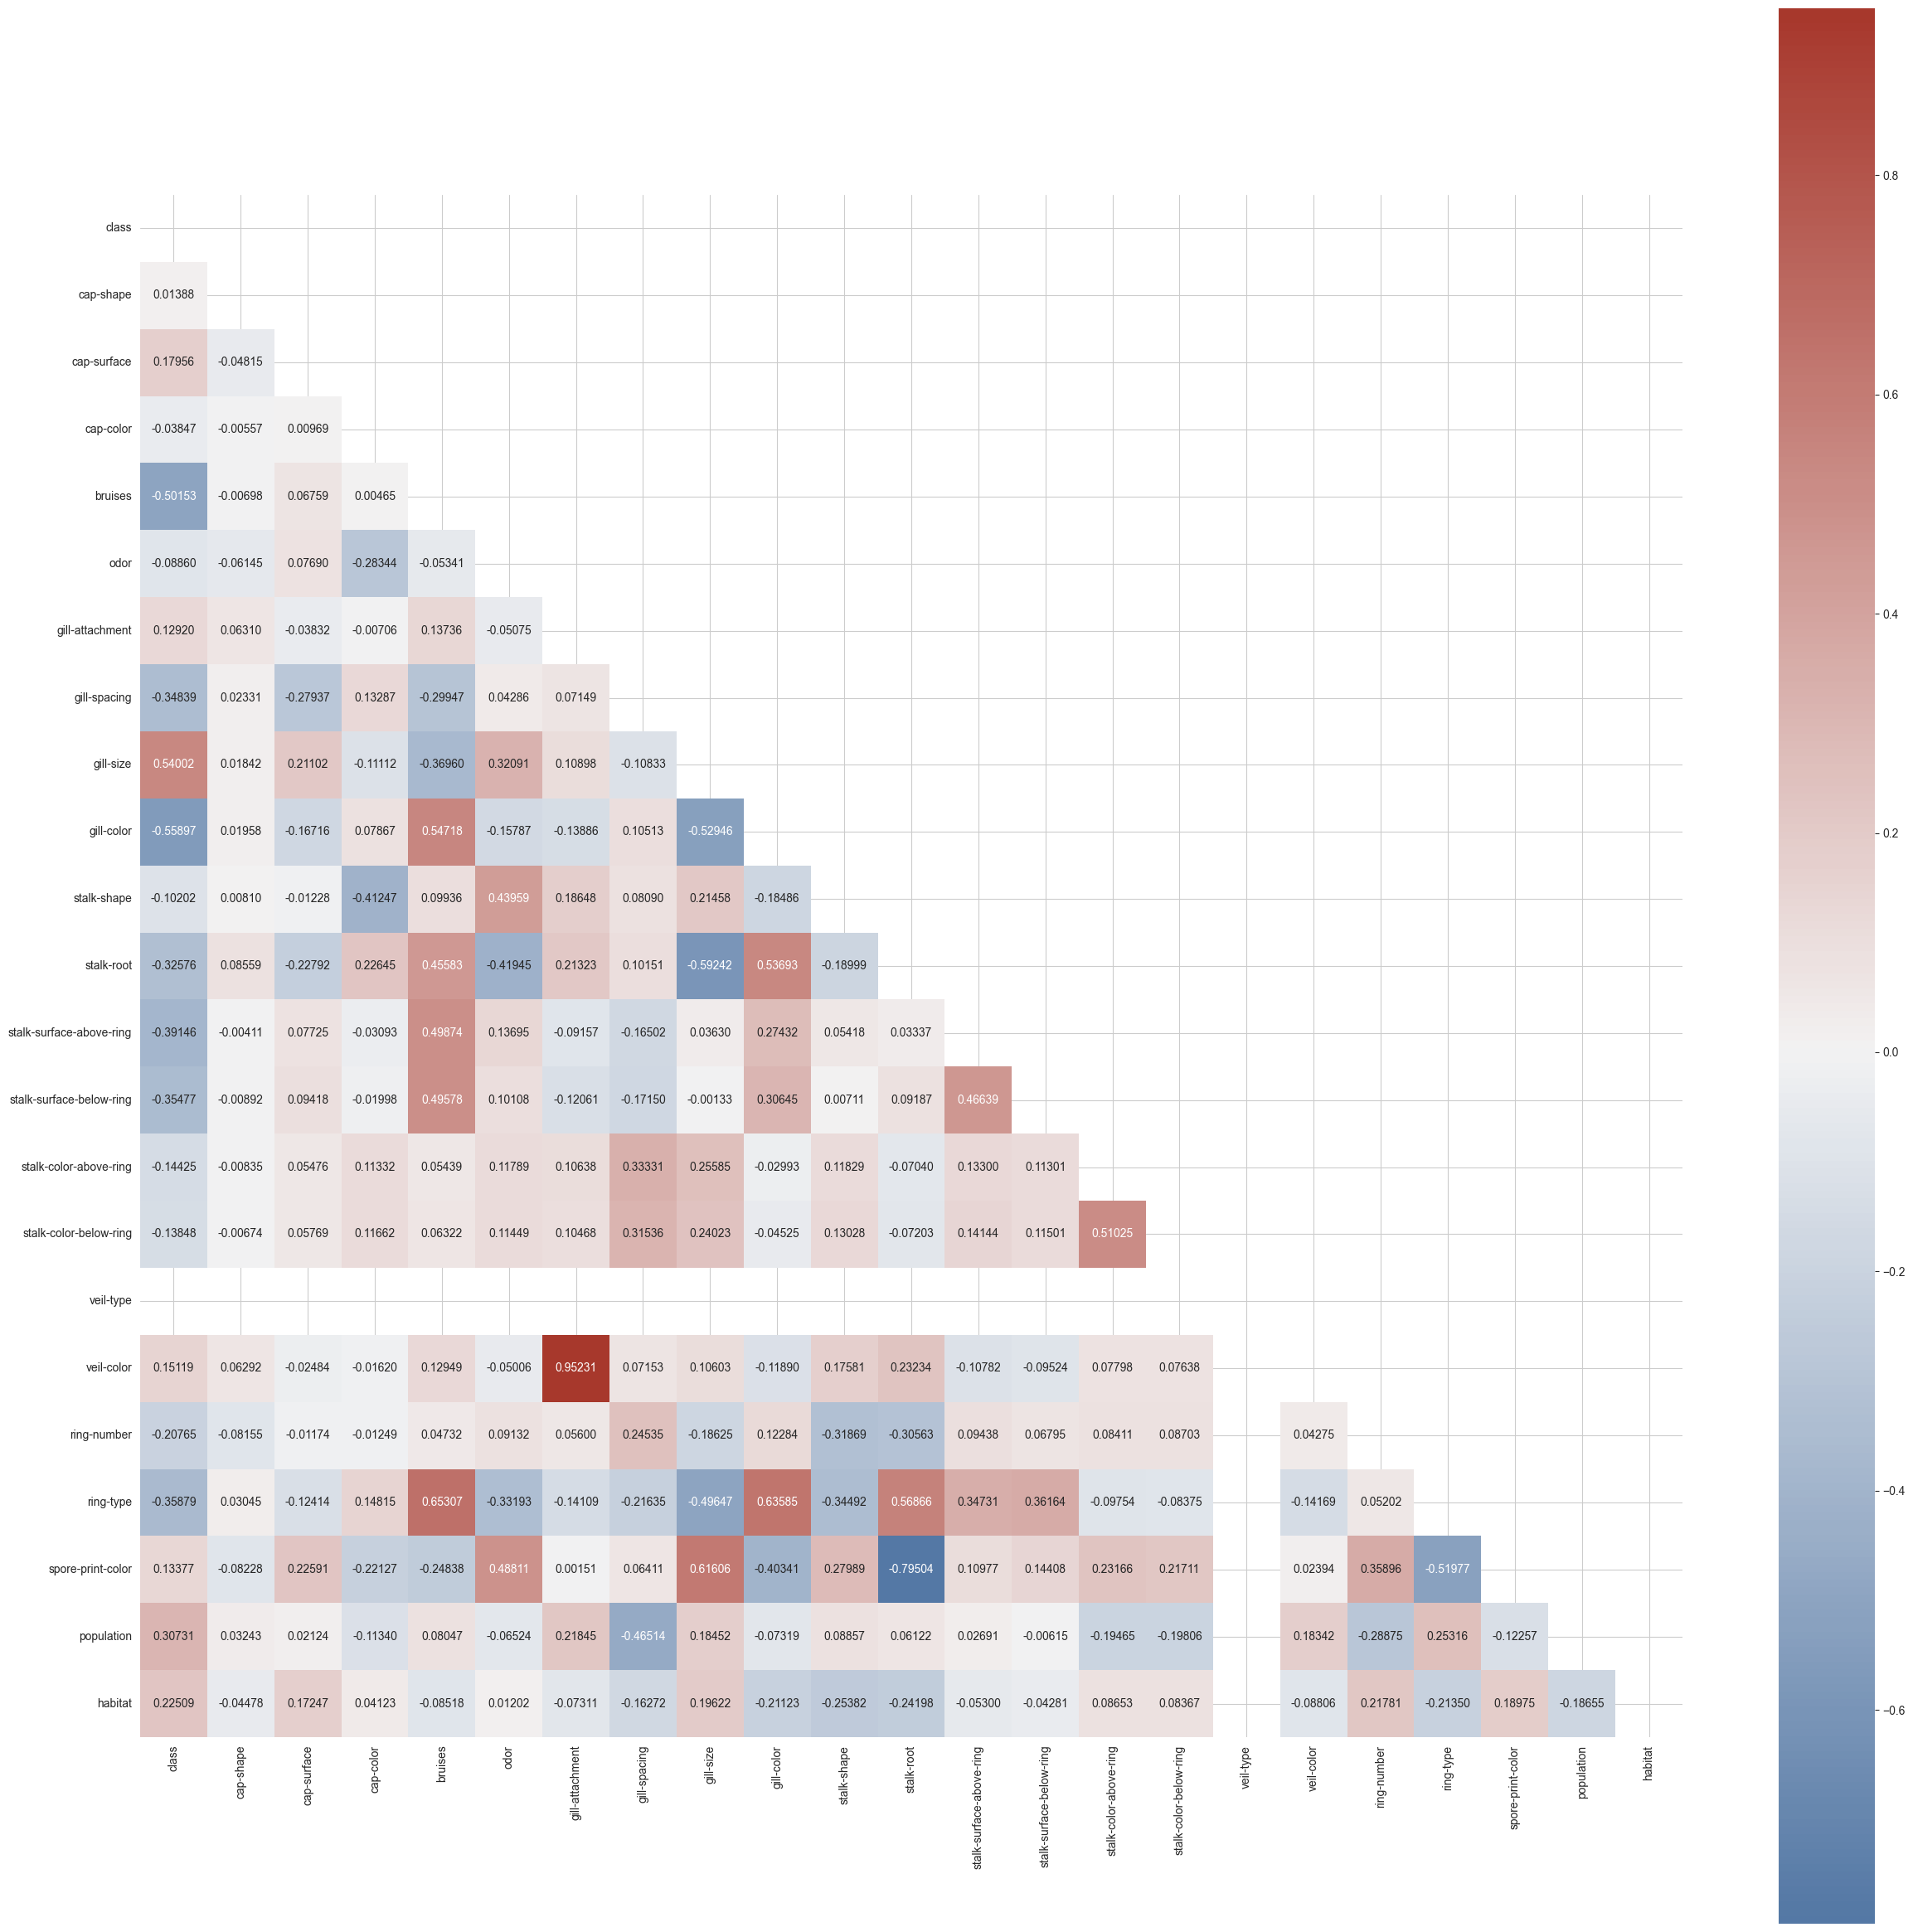

In [4]:
from matplotlib import pyplot as plt

matrix = mushrooms_encoded.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(30, 30))
sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.5f', square=True, cmap=cmap)
plt.show()

In [5]:
from src.gain_ratio.GainRatio import GainRatio

gain_ratio = GainRatio(mushrooms_encoded, 'class')

gain_ratios = gain_ratio.gain_ratio_for_all()

for k, v in gain_ratios.items():
    print("{}: {}".format(k, v))

C:\Users\osipo\PycharmProjects\lab2\src\gain_ratio\GainRatio.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return self.__gain(target, attribute) / self.__split_info(target, attribute)


stalk-shape: 0.007616338689020934
cap-color: 0.014361447780696824
cap-surface: 0.018146924511641294
cap-shape: 0.029522069885901805
habitat: 0.06894550944561546
stalk-root: 0.07395690261310016
gill-attachment: 0.0818178118172925
ring-number: 0.09140595216694161
population: 0.10080772885489371
veil-color: 0.12136782986326969
stalk-color-below-ring: 0.1220402829885157
stalk-color-above-ring: 0.13106361757552198
gill-color: 0.13759668648296527
gill-spacing: 0.15815426132075966
stalk-surface-below-ring: 0.1943304679865193
bruises: 0.19644043129956856
ring-type: 0.20716374427196207
spore-print-color: 0.2181821775324035
stalk-surface-above-ring: 0.23312407255673345
gill-size: 0.25794648736352666
odor: 0.39064815650330087
veil-type: nan


Удаляем атрибуты с высокой корреляцией или с маленьким Gain Ratio

In [7]:
# Высокая корреляция
mushrooms_encoded.drop(columns=['veil-type'], inplace=True)
mushrooms_encoded.drop(columns=['gill-attachment'], inplace=True)
mushrooms_encoded.drop(columns=['bruises'], inplace=True)
mushrooms_encoded.drop(columns=['gill-size'], inplace=True)
mushrooms_encoded.drop(columns=['gill-color'], inplace=True)
# Низкий gain ratio
mushrooms_encoded.drop(columns=['stalk-shape'], inplace=True)
mushrooms_encoded.drop(columns=['cap-color'], inplace=True)
mushrooms_encoded.drop(columns=['cap-surface'], inplace=True)
mushrooms_encoded.drop(columns=['cap-shape'], inplace=True)

class_column = mushrooms_encoded.pop('class')
mushrooms_encoded.insert(len(mushrooms_encoded.columns), 'class', class_column)

mushrooms_encoded.to_csv('./mushrooms_filtered.csv', index=False)

## Обучение модели
На тестовой выборке модель показала следующие результаты:

***Accuracy = 0.9661538461538461***
***Precision = 0.9889604415823368***
***Recall = 0.9615384615384616***
***AUC = 0.9689349112426037***